# Clustering the data

### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Reading the dataset

In [2]:
data = pd.read_csv('COVID19.csv')
data.head()

,case_in_country,age,If_onset_approximated,visiting Wuhan,from Wuhan,death,recovered,gender_male,period_between_symptom_onset_hosp_visit,period_of_exposure,period_of_symptom_onset_with_exposure,days_reported_after_hosp_visit
0,285.401801,66.0,0.0,1,0.0,0,0,1,8.000000,6.000000,5.000000,9.0
1,285.401801,56.0,0.0,0,1.0,0,0,0,0.000000,5.131148,8.180723,5.0
2,285.401801,46.0,0.0,0,1.0,0,0,1,13.000000,5.131148,8.180723,4.0
3,285.401801,60.0,0.0,1,0.0,0,0,0,2.761693,5.131148,8.180723,2.0
4,285.401801,58.0,0.0,0,0.0,0,0,1,2.761693,5.131148,8.180723,7.0


### Importing KMeans Cluster from sklearn

In [3]:
from sklearn.cluster import KMeans

### using the elbow method to find the optimal number of clusters

In [4]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

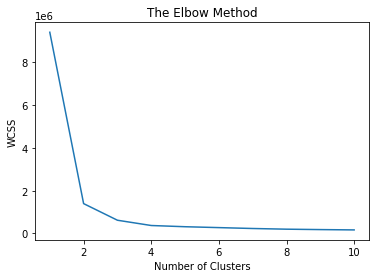

In [5]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### we can see number of clusters should be 3

In [6]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(data)

In [7]:
y_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### lets make dataframe of label and concatenate it with our dataset

In [8]:
label = pd.DataFrame(y_kmeans)
labeled_data = pd.concat([data, label], axis=1)
labeled_data = labeled_data.rename({0:'labels'},axis=1)

In [9]:
labeled_data.head()

,case_in_country,age,If_onset_approximated,visiting Wuhan,from Wuhan,death,recovered,gender_male,period_between_symptom_onset_hosp_visit,period_of_exposure,period_of_symptom_onset_with_exposure,days_reported_after_hosp_visit,labels
0,285.401801,66.0,0.0,1,0.0,0,0,1,8.000000,6.000000,5.000000,9.0,2
1,285.401801,56.0,0.0,0,1.0,0,0,0,0.000000,5.131148,8.180723,5.0,2
2,285.401801,46.0,0.0,0,1.0,0,0,1,13.000000,5.131148,8.180723,4.0,2
3,285.401801,60.0,0.0,1,0.0,0,0,0,2.761693,5.131148,8.180723,2.0,2
4,285.401801,58.0,0.0,0,0.0,0,0,1,2.761693,5.131148,8.180723,7.0,2


### Now using pairplot with hue as labels we can visualize 

C:\Users\manis\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\manis\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\manis\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


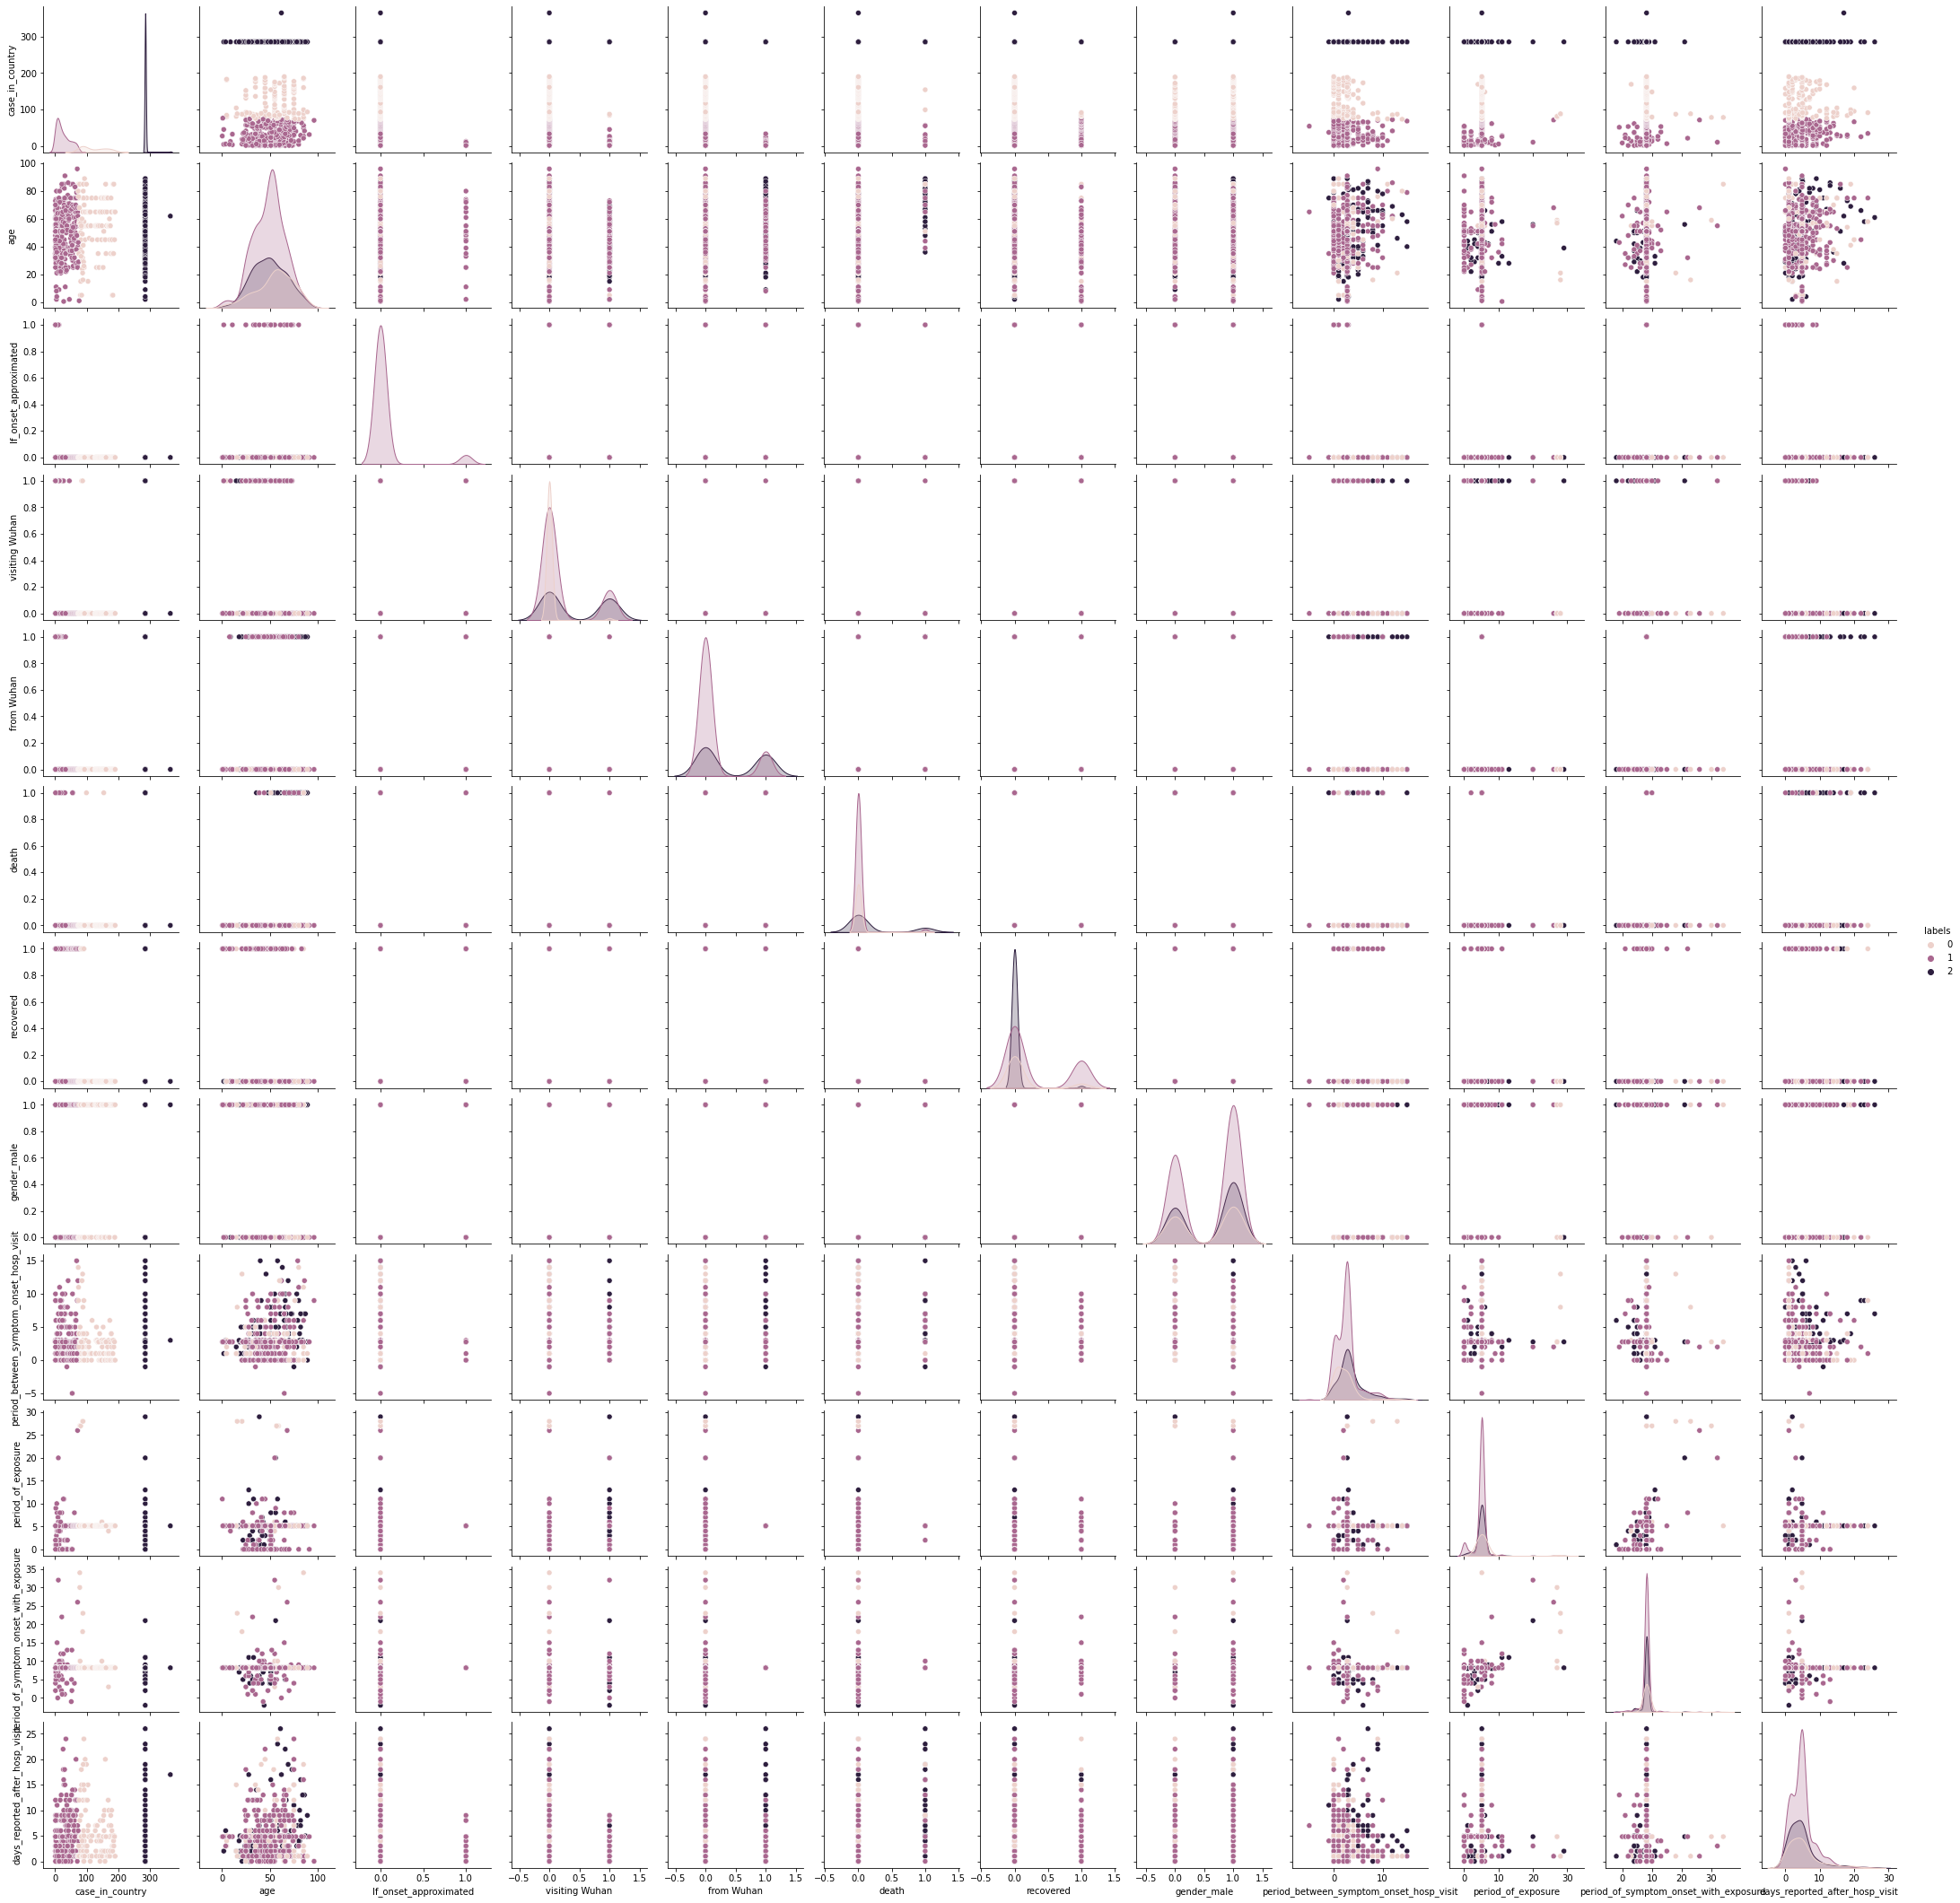

In [10]:
sns.pairplot(labeled_data, hue='labels')

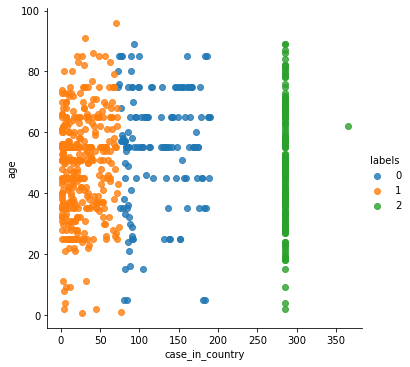

In [11]:
sns.lmplot(x='case_in_country', y='age', data=labeled_data, hue='labels', fit_reg=False)